## Finding Breast Cancer-Project

In [1]:
#importing the library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Conv1D,Dense,Dropout,Flatten,MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
print(tf.__version__)

2.0.0-rc0


In [2]:
# Ge the data
data=datasets.load_breast_cancer()
X=pd.DataFrame(data=data.data,columns=data.feature_names)
X.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [3]:
#Give y the value of target
y=data.target

In [4]:
#We need to do train_test_split by choosing random_state=0. This,in order to select random values everytime
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [5]:
#In order to bring the features to the same scale we need to use StandardScaler. In addition, when we apply StandardScaler,The data will be converted to Numpy array
#only now we can reshape the data from 2-D in 3-D( for CNN model data needs to be 3-D)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [6]:
X_train.shape,y_train.shape

((455, 30), (455,))

In [7]:
#reshaping the data
X_train=X_train.reshape(455,30,1)
X_test=X_test.reshape(114,30,1)

In [8]:
# Builing the Model
epochs=70

model=Sequential()
#first layers(input layer)
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#first hidden layer
model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#second hidden layer is returning 2-D to vector
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

#output
model.add(Dense(1,activation='sigmoid'))

In [9]:
#we are compiling the model by using Adam optimizer, binary crossentropy and for the metrics we are choosing "accuracy"
model.compile(optimizer=Adam(learning_rate=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
#we fit the model
model_data=model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

W0121 17:13:10.583934 11740 deprecation.py:323] From C:\Users\endri.mosko\AppData\Local\Continuum\anaconda3\envs\endri\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 455 samples, validate on 114 samples
Epoch 1/70
455/455 [==============================] - 1s 3ms/sample - loss: 0.8577 - accuracy: 0.5912 - val_loss: 0.6485 - val_accuracy: 0.7544
Epoch 2/70
455/455 [==============================] - 0s 194us/sample - loss: 0.6666 - accuracy: 0.6549 - val_loss: 0.6339 - val_accuracy: 0.8333
Epoch 3/70
455/455 [==============================] - 0s 183us/sample - loss: 0.5350 - accuracy: 0.7626 - val_loss: 0.6155 - val_accuracy: 0.8596
Epoch 4/70
455/455 [==============================] - 0s 176us/sample - loss: 0.4680 - accuracy: 0.7956 - val_loss: 0.5920 - val_accuracy: 0.8772
Epoch 5/70
455/455 [==============================] - 0s 167us/sample - loss: 0.3631 - accuracy: 0.8330 - val_loss: 0.5646 - val_accuracy: 0.9035
Epoch 6/70
455/455 [==============================] - 0s 175us/sample - loss: 0.4048 - accuracy: 0.8549 - val_loss: 0.5318 - val_accuracy: 0.9211
Epoch 7/70
455/455 [==============================] - 0s 178us/sample - loss: 0.

In [11]:
#function for plotting the data from model_data
def learningCurve(model_data, epoch):
    # Plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, model_data.history['accuracy'])
    plt.plot(epoch_range, model_data.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, model_data.history['loss'])
    plt.plot(epoch_range, model_data.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

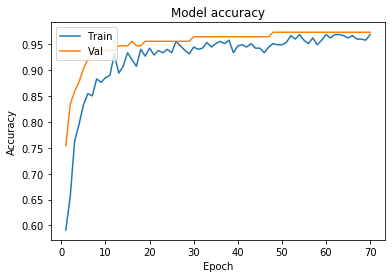

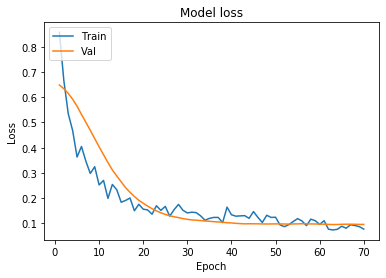

In [12]:
learningCurve(model_data, epochs)